# PDIE8 - Processamento Digital de Imagem

![Capa](https://m.media-amazon.com/images/I/71wa841+qgL._AC_UF1000,1000_QL80_.jpg)

##### Repositorio dos Códigos feitos em aula da Disciplina

#### Feito por: Vinicius de Souza Santos
#### Lecionado por: Murilo Varges

## Aula 7.2 - 12/09 - Desafios Introdução PDI



### Atividades - Combining Images

* Objetivo: Implementar códigos que utilizam operações básicas combinando duas imagens.

    * Verificação de defeitos em placas: Basicamente realizando uma operação de subtração entre uma imagem de uma placa sem defeito com uma placa com defeito é possivel encontrar defeitos no processo de fabricação: 

     * https://web.stanford.edu/class/ee368/Handouts/Lectures/Examples/3-Combining-Images/Defect_Detection/

* Detecção de movimento: A partir de um vídeo, ao realizar a subtração do fundo da cena sem nenhuma pessoa é possível detectar movimentos: 

    * https://web.stanford.edu/class/ee368/Handouts/Lectures/Examples/3-Combining-Images/Background_Subtraction/

### Verificação de defeitos em placas: Basicamente realizando uma operação de subtração entre uma imagem de uma placa sem defeito com uma placa com defeito é possivel encontrar defeitos no processo de fabricação:


Importanto Bibliotecas


In [19]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


Carregando as Imagens

In [20]:
placa_ori = np.array(Image.open(r'\Meu Drive\Faculdade\Aula\2023.2\Processamento Digital de Imagem\Aulas\Aula 8\Image\pcbCropped.png'))
placa_def = np.array(Image.open(r'\Meu Drive\Faculdade\Aula\2023.2\Processamento Digital de Imagem\Aulas\Aula 8\Image\pcbCroppedTranslatedDefected.png'))

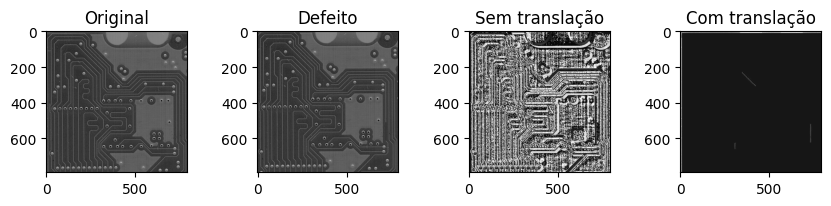

In [21]:
row = placa_ori.shape[1]
col = placa_ori.shape[0]
xShift = 10
yShift = 10
registImg = np.zeros(placa_ori.shape)
registImg[yShift + 1 : row, xShift + 1 : col] = placa_def[1 : row - yShift, 1 : col - xShift]

fig = plt.figure(figsize=(10, 5))
plt1 = plt.subplot(1, 4, 1)
plt2 = plt.subplot(1, 4, 2)
plt3 = plt.subplot(1, 4, 3)
plt4 = plt.subplot(1, 4, 4)
plt1.title.set_text("Original")
plt2.title.set_text('Defeito')
plt3.title.set_text('Sem translação')
plt4.title.set_text('Com translação')
plt1.imshow(placa_ori, cmap='gray')
plt2.imshow(placa_def, cmap='gray')
plt3.imshow((placa_ori - placa_def), cmap='gray')
plt4.imshow(placa_ori - registImg, cmap='gray')
plt.subplots_adjust(wspace=0.5)



In [11]:
import cv2
imgPcbOrigem = cv2.imread("/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/Image/pcb.png", cv2.IMREAD_GRAYSCALE)
imgPcbDefeito = cv2.imread("/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/Image/pcbDefected.png", cv2.IMREAD_GRAYSCALE)

### Detecção de movimento: A partir de um vídeo, ao realizar a subtração do fundo da cena sem nenhuma pessoa é possível detectar movimentos: 

Importando Bibliotecas

In [29]:
import cv2
import numpy as np

Abrir o vídeo

In [39]:
video_capture = cv2.VideoCapture('/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/Image/surveillance.mpg')

Configurar a gravação do vídeo de saída

In [40]:
frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))
out = cv2.VideoWriter('/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/Image/Background_Subtraction.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (frame_width, frame_height))


Parâmetros para a subtração de fundo

In [41]:
alpha = 0.95
theta = 0.1
background = None

In [42]:
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    # Converter o frame para escala de cinza
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if background is None:
        background = gray_frame.astype(float)
        continue

    # Atualizar o modelo de fundo com suavização exponencial
    background = alpha * background + (1 - alpha) * gray_frame

    # Calcular a diferença entre o frame atual e o fundo
    diff_frame = np.abs(gray_frame - background)
    thresh_frame = (diff_frame > theta * 255).astype(np.uint8)

    # Gravar o frame de saída
    out.write(cv2.cvtColor(thresh_frame * 255, cv2.COLOR_GRAY2BGR))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
video_capture.release()
out.release()
cv2.destroyAllWindows()


Liberar recursos

In [43]:
video_capture.release()
out.release()
cv2.destroyAllWindows()